In [1]:
source('helpers.R')

In [ ]:
# BiocManager::install("homologene")
library(homologene)

In [3]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [4]:
cts = c('CD8+ T', 'CD8+ CAR T', 'Cycling CD8+ T')
cd8.target <- subset(prepost, cell_type %in% cts) 

cd8.target$group_by_cluster = 'CART' 
cd8.target$group_by_cluster[cd8.target$cell_type %!in% c('CD8+ CAR T')] = 'Endogenous'
cd8.target$sample = paste0(cd8.target$sample_id, '_', cd8.target$group_by_cluster)

In [5]:
cd8.target$Day_Type_CAR = paste0(cd8.target$Day, ' CD8+ ', cd8.target$group_by_cluster)
order = c('D0 CD8+ Endogenous','D7 CD8+ Endogenous','D21 CD8+ Endogenous','D7 CD8+ CART','D21 CD8+ CART')
cd8.target$Day_Type_CAR <- factor(cd8.target$Day_Type_CAR, levels = order)
(table(cd8.target$Day_Type_CAR))



 D0 CD8+ Endogenous  D7 CD8+ Endogenous D21 CD8+ Endogenous        D7 CD8+ CART 
               3514                3799                2644               10856 
      D21 CD8+ CART 
               2274 

In [71]:
# https://www.cell.com/cms/10.1016/j.immuni.2007.09.006/attachment/b2c2a30c-7327-4980-bb36-1c5b83f5e31d/mmc1.pdf
# Wherry et al., Immunity 27, Supplemental Table 2
wherry_tex_vs_teff <- c(
  # I. Inhibitory receptors
  "Cd244", "Pdcd1", "Ctla4", "Gp49b", "Ptger4", "Cd160", "Lag3", "Ptger2",
  # II. Cell-surface receptors & ligands
  "Cd7", "Tnfrsf9", "Glycop", "Vcam1", "Tnfsf6", "Itm2a", "Mox2", "Itgav", "Cd9",
  # III. Homing & migration
  "Ccl3", "Cxcr4", "Ccl4", "Ccrl2",
  # VI. TGF-β pathway
  "Smad1",
  # VIII. Signaling
  "Rgs16", "Gpr56", "Tank", "Dusp1", "Gpr65", "Ptpn13", "Prkwnk", "Il6st", "Itpr5",
  "Jak3", "Map3k1", "Sh2d2a", "Socs3",
  # IX. Cytoskeleton
  "Actn1",
  # X. IFN response
  "Isg20", "G1p2", "Icsbp1",
  # XI. Proteases
  "Serpina",
  # XII. Antigen receptors
  "Tcrg-V4", "Tcrb-V1",
  # XIV. Transcription
  "Pbx3", "Eomes", "Atf1", "Ahr", "Egr2", "Nfatc1", "Zfp91", "Hist1h2",
  # XV. Apoptosis / annexins
  "Bcl2", "Casp3",
  # XVI. Membrane biology & vesicle transport
  "Plscr1",
  # XVII. Cell cycle
  "Gas2", "Cks2",
  # XVIII. Metabolism
  "Car2", "Slc12a2", "Art3", "Gpd2", "Ndufa5", "Cyp4v3", "Entpd1", "C76628",
  # XIX. Translation
  "Sfrs7",
  # XX. Miscellaneous
  "Mtv43", "C79248", "Penk1", "Coch", "Nr4a2", "A43010", "Ier5", "Septin",
  "Rcn", "Wbp5", "Pbef1", "Ppm1b", "Ddit4", "Kitl", "Trim47", "Rnf11",
  "Nrip1", "Tubb2", "Spp1", "Klk6", "Ly75", "Slc2a1", "Bub1", "Ndfip1",
  "Spred2", "Cbx4", "Tagln2", "Hint1", "Lef1", "Lsp1", "Tob1"
)


In [72]:
hh <- mouse2human(wherry_tex_vs_teff)
wherry_tex_vs_teff_human <- unique(hh$humanGene)

In [73]:
pace_cytox <- c(
  "S1PR5","KLRK1","CD244","GZMA","ANXA1","CX3CR1","KLRG1","ZEB2","CCL9","KLRC1",
  "IL1RL1","KLRA9","LXN","ITGB2","SNX10","LAG3","S100A4","ISG20","TBX21","RORA",
  "PRF1","LYN","IFNG","ID2","IFITM3","S100A10","CCR2","PERP","NRP1","S100A6",
  "ITGAX","SQLE","ITGA4","LSP1","ADAM8","S100A8","BHLHE40","PDCD1","ANXA2","BATF3",
  "BRCA1","CASP3","CD99","EZH2","IRF4","LITAF","MPEG1","PRDX4","RHD","SNX3",
  "IGSF10","SERPINB9","PRDM1","ANXA1","SIVA1","GZMB","LGALS1","ATPIF1","CD48","SUZ12",
  "F2RL3","TK1","LGALS3","CBX1","VPS45","LMNB1","BIRC5","ANXA4"
)

In [74]:
cd8.target <- AddModuleScore_UCell(cd8.target, features = list(wherry_exhaust = wherry_tex_vs_teff_human), ncores = 1, name='')

Warning message:
"The following genes were not found and will be
                        imputed to exp=0:
* CCL3L3,GPR56,WBP5"


In [75]:
cd8.target <- AddModuleScore_UCell(cd8.target, features = list(pace_cytox = pace_cytox), ncores = 1, name='')

Warning message:
"The following genes were not found and will be
                        imputed to exp=0:
* CCL9,KLRA9,ATPIF1"


Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


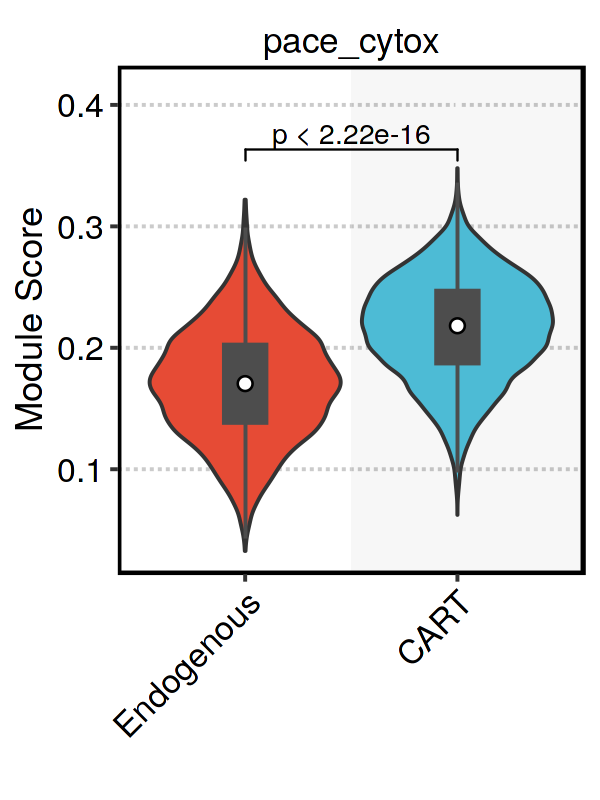

In [76]:
options(repr.plot.width=3, repr.plot.height=4, repr.plot.res=200)
p <- FeatureStatPlot(cd8.target, group.by = "group_by_cluster", ncol=4, 
                stat.by = c('pace_cytox'), palette='npg', add_box=T, box_color = "grey30", box_width = 0.2, 
                box_ptsize = 2, plot_type='violin', comparisons=list(c(1,2)), sig_label="p.format", 
                add_point=F, pt.size=0, pt.alpha=1)  &
    xlab('') & ylab('Module Score')&  
   NoLegend()
p

In [77]:
pdf(file.path(panel.path, paste0("pace_cytox.pdf")), width=3, height=4)
p
dev.off()

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


pdf 
  2

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


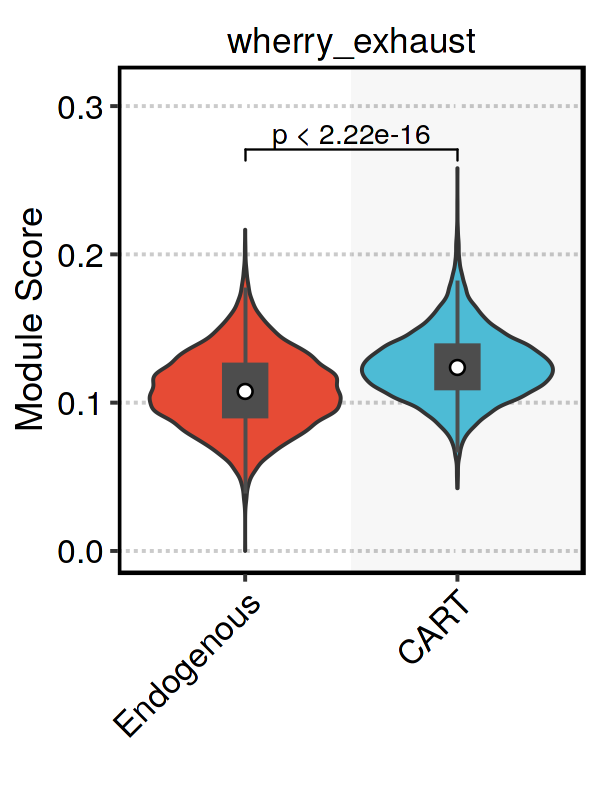

In [78]:
options(repr.plot.width=3, repr.plot.height=4, repr.plot.res=200)
p <- FeatureStatPlot(cd8.target, group.by = "group_by_cluster", ncol=4, 
                stat.by = c('wherry_exhaust'), palette='npg', add_box=T, box_color = "grey30", box_width = 0.2, 
                box_ptsize = 2, plot_type='violin', comparisons=list(c(1,2)), sig_label="p.format", 
                add_point=F, pt.size=0, pt.alpha=1)  &
    xlab('') & ylab('Module Score')& # 
   NoLegend()
p

In [79]:
pdf(file.path(panel.path, paste0("wherry_exhaust.pdf")), width=3, height=4)
p
dev.off()

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


pdf 
  2

In [89]:
for (metric in c("wherry_exhaust", "pace_cytox")) {
stats_unpaired <- cd8.target@meta.data %>% group_by(group = group_by_cluster) %>%
  summarise( n = sum(!is.na(.data[[metric]])), median = median(.data[[metric]], na.rm = TRUE),
    IQR_low  = quantile(.data[[metric]], 0.25, na.rm = TRUE), IQR_high = quantile(.data[[metric]], 0.75, na.rm = TRUE), 
    .groups  = "drop"
  )

wt <- wilcox.test(formula = as.formula(paste(metric, "~ group_by_cluster")), 
                  data = cd8.target@meta.data, paired = FALSE, exact = FALSE)
 
pval <- ifelse(wt$p.value < 0.001, "<0.001", sprintf("%.3f", wt$p.value))
 
endog <- stats_unpaired %>% filter(group == "Endogenous")
cart  <- stats_unpaired %>% filter(group == "CART")
  
cat(glue::glue(
  "{metric} scores were compared between endogenous CD8\u207A T cells (n={endog$n}) ",
  "and CAR T cells (n={cart$n}). Endogenous cells had a median score of ",
  "{formatC(endog$median, format=\"f\", digits=2)} ",
  "(IQR {formatC(endog$IQR_low, format=\"f\", digits=2)}–",
  "{formatC(endog$IQR_high, format=\"f\", digits=2)}), whereas CAR T cells had a median of ",
  "{formatC(cart$median, format=\"f\", digits=2)} ",
  "(IQR {formatC(cart$IQR_low, format=\"f\", digits=2)}–",
  "{formatC(cart$IQR_high, format=\"f\", digits=2)}). ",
  "An unpaired Wilcoxon rank-sum test yielded p = {pval}.\n\n\n"
)) 
}

wherry_exhaust scores were compared between endogenous CD8⁺ T cells (n=9957) and CAR T cells (n=13130). Endogenous cells had a median score of 0.11 (IQR 0.09–0.13), whereas CAR T cells had a median of 0.12 (IQR 0.11–0.14). An unpaired Wilcoxon rank-sum test yielded p = <0.001.

pace_cytox scores were compared between endogenous CD8⁺ T cells (n=9957) and CAR T cells (n=13130). Endogenous cells had a median score of 0.17 (IQR 0.14–0.20), whereas CAR T cells had a median of 0.22 (IQR 0.19–0.25). An unpaired Wilcoxon rank-sum test yielded p = <0.001.

